In [1]:
import numpy as np
import laspy

with laspy.open('./LiDAR/Mar16_val.laz') as fh:
    print('Points from Header:', fh.header.point_count)
    las = fh.read()
    print(las)
    print('Points from data:', len(las.points))

    ground_pts = las.classification == 2
    bins, counts = np.unique(las.return_number[ground_pts], return_counts=True)
    print('Ground Point Return Number distribution:')
    for r, c in zip(bins, counts):
        print(f'    {r}: {c}')

Points from Header: 608390


LaspyException: No LazBackend selected, cannot decompress data

In [2]:
laz = laspy.read('./LiDAR/Mar16_val.laz')
print(np.unique(las.classification))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [3]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue']

In [4]:
las.point_format.id

3

In [5]:
las.vlrs

[]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./LiDAR/Mar16_train.txt', sep='\t')

In [8]:
df.head()

,//X,Y,Z,R,G,B,Intensity,NumberOfReturns,ReturnNumber,Classification
0,513864.390999,5.426828e+06,249.753998,142,151,120,306,2,2,0
1,513864.460999,5.426826e+06,249.594009,145,150,130,380,1,1,0
2,513864.291000,5.426827e+06,249.664001,138,150,121,381,2,2,0
3,513864.200996,5.426827e+06,249.714005,138,149,118,107,2,2,0
4,513864.291000,5.426825e+06,249.514008,148,152,146,348,2,2,0


<Axes: ylabel='Frequency'>

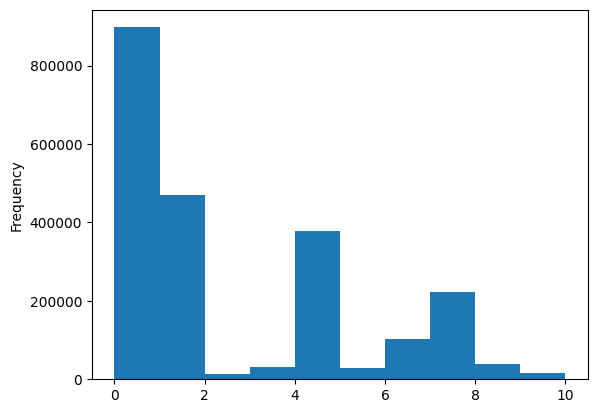

In [9]:
df.Classification.plot.hist()

In [10]:
df["Classification"].value_counts(normalize=True)

Classification
0     0.408120
1     0.213753
4     0.171496
7     0.100990
6     0.046410
8     0.018281
3     0.013721
5     0.013116
9     0.006958
2     0.006356
10    0.000799
Name: proportion, dtype: float64

In [11]:
import numpy as np
import open3d as o3d

sample = df.sample(n=200_000, random_state=42)

points = sample[["//X", "Y", "Z"]].values
labels = sample["Classification"].values

unique_labels = np.unique(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))(labels)[:, :3]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

o3d.visualization.draw_geometries([pcd])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


C:\Users\yrano\AppData\Local\Temp\ipykernel_14600\2571986409.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))(labels)[:, :3]


In [ ]:
df.describe()[["//X","Y","Z"]]

,//X,Y,Z
count,2.200213e+06,2.200213e+06,2.200213e+06
mean,5.138979e+05,5.426948e+06,2.433145e+02
std,8.299079e+01,2.107129e+02,1.275074e+01
min,5.137674e+05,5.426487e+06,2.216900e+02
25%,5.138171e+05,5.426778e+06,2.314890e+02
50%,5.139012e+05,5.426973e+06,2.403970e+02
75%,5.139703e+05,5.427158e+06,2.538050e+02
max,5.140800e+05,5.427270e+06,2.834360e+02


<Axes: ylabel='Frequency'>

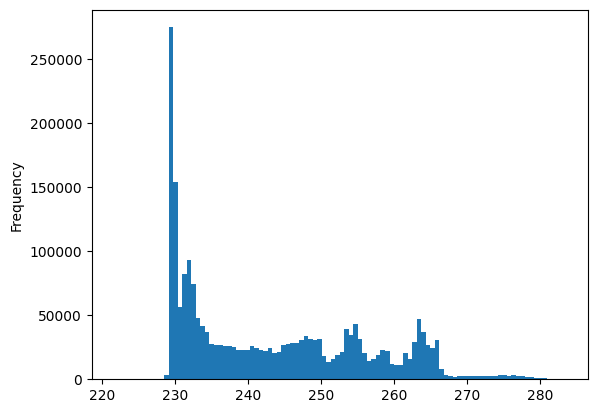

In [16]:
df["Z"].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

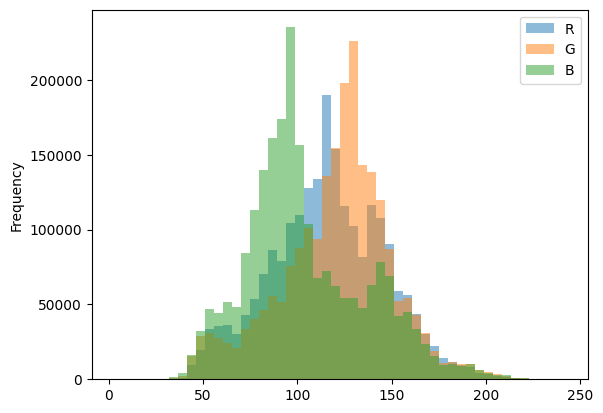

In [17]:
df[["R","G","B"]].plot.hist(bins=50, alpha=0.5)

(0.0, 1000.0)

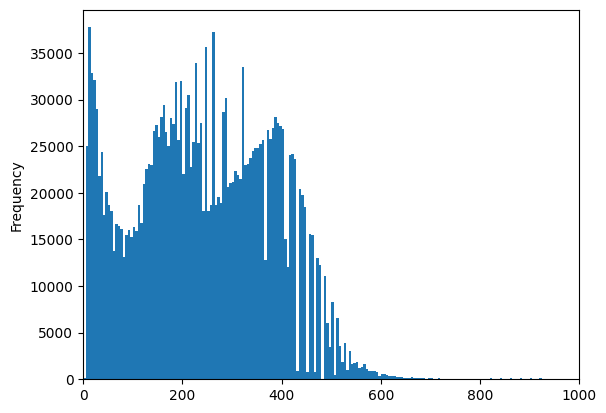

In [20]:
df["Intensity"].plot.hist(bins=200, range=(0,1000))
plt.xlim(0,1000)

In [21]:
df["Intensity"].describe()

count    2.200213e+06
mean     2.472990e+02
std      3.769377e+02
min      0.000000e+00
25%      1.370000e+02
50%      2.390000e+02
75%      3.540000e+02
max      6.553400e+04
Name: Intensity, dtype: float64

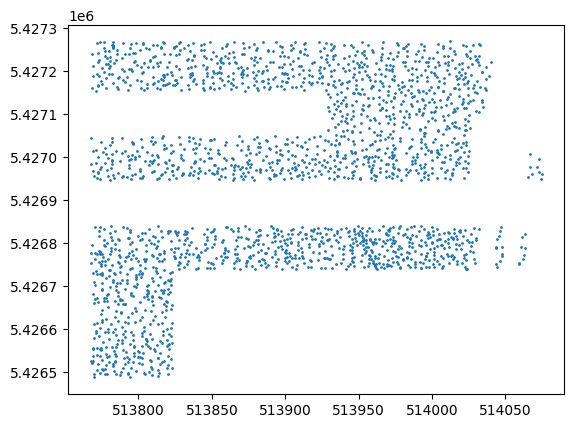

In [19]:
plt.scatter(df["//X"][::1000], df["Y"][::1000], s=1)

In [6]:
import open3d as o3d

In [13]:
pcd = o3d.io.read_point_cloud('./LiDAR/Mar16_val.laz')
print(pcd)

[Open3D WARNING] Read geometry::PointCloud failed: unknown file extension for .\LiDAR\Mar16_val.laz (format: auto).
PointCloud with 0 points.


In [1]:
from pyntcloud import PyntCloud

In [ ]:
file = PyntCloud.from_file('./LiDAR/Mar16_test_GroundTruth.laz')
file_cloud = file.get_sample("mesh_random", n=100000, as_PyntCloud=True)

file_cloud.plot()

TypeError: PyntCloud.get_sample() missing 1 required positional argument: 'name'